# Ash Coalescence

# Introduction 

Volcanic eruptions can throw lots of ash into the stratosphere containing sulfates. These have the effect of scattering incoming light from the sun in all directions. Less light reaches the surface of the Earth therefore causing a cooling effect. The Particles move around in small random movements and will combine if they get close and fall out of the stratosphere due to their extra weight. This causes the number of particles to decrease with time. To model this effect an arbritary box in the stratosphere is tracked along with the particles populated within it. The boundaries are confined so the only way the particles can leave the model is by coellesing. The model is analysed to determine the rate of decay of the particles.

# Plan

### Initialise model
- array of len(n)
- Box of size L
- random initial position spread uniformly

### Loop overtime
- update the positions in small increments 
- confine particles to box of lenth L so they come in the other side
- set a mask so the particles are deleted when they are under a distance d apart
- update the array with the new position of the undeleted particles
- record the new value of particles left in the simulation
- stop the simulation when n < a 
                              
### Plot
- Number of particles against time

### Analyse
- Create a list of the number of particles after each movement
- plot the values agaisnt the index

--- 

# Development of Model

The model is broken up into segments therefore is not looped. This code will provide one run of the simulation, for more runs the working model section is used.

## Step 1: Animate and confine randomly moving particles

Load in relevent packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl

Set starting conditions including the number of particles (N), the position of each N (X), and the length and width of the box in the atmosphere (L).

In [2]:
N = 200    # Initial number of particles
X  = np.random.random((N,2)) #randomly generate a of starting position for each N
L=1 #boundary of sample box in the atmosphere

Define a function to add a small random movement to the position (X) of each N. This can be in any direction.

In [3]:
def movement(X):
    dX=np.random.normal(loc=0.0, scale=0.01, size=(len(X),2)) #generate a small random brownian movement for every element in the array X
    X=X+dX #add small random distances to the position of each particle
    return X
X=movement(X)

To prevent losing particles via the edges of the box, set the boundary conditions so going past L will tranport the particles back to 0.

In [4]:
#set the boundary conditions such that when a particle exceeds the plot at one side it is transported to the other. 
def boundary(X):
    X[X>L]-=L #boolean mask to replace particles outwith the boundary to the equivalent point on the other side
    X[X<0]+=L
    return X
X=boundary(X)

## Step 2: Find where the particles are close enough to combine and remove them from the array

Define a function for finding the minimum distance between all points.

In [5]:
def nearestNeighbour_usingUfuncs(X):
    nParticles = len(X)
    diff = X.reshape(nParticles,1,2)-X #adapt the shape for the distance between the x value of position (col1) and the y value of position (col2) in 2 dimensions (col3)
    D = (diff ** 2).sum(2) #sum the square of the distances
    j = np.arange(nParticles)
    D[j,j] = np.inf #particles are 0 distance from themselves, set diagonal to infinity to eradicate these
    
    nearestNeighbourNumber = np.argmin(D, 1) ## find minimum distances between all points in X
    nearestNeighbourDistance = D[ j, nearestNeighbourNumber]
    
    return nearestNeighbourNumber, nearestNeighbourDistance

In [6]:
index,distance=nearestNeighbour_usingUfuncs(X) #use the defined function

Apply a boolean mask to update the array X with only the values with a sufficiently large distance.

In [7]:
X=X[distance>0.001] #keep all large distances and remove the close particles, save back into X to restart the loop

## Step 3: Create a list of the number of particles in each run of the loop

In [8]:
particles=[N]
particles.append(len(X)) #update the list of particle numbers after each iteration of the loop 

## Step 4: Plot the simulation

Plot each iteration of the loop for a visual representaion of the sulfates in the atmosphere.

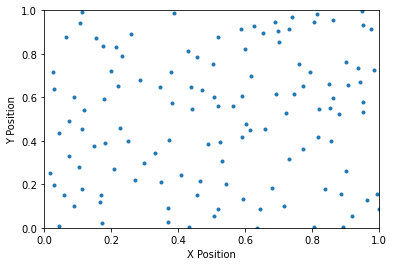

In [9]:
pl.clf()
pl.plot(X[:,0], X[:,1], ".") #plot x and y position for every element 
pl.xlim(0,L) #plot boundaries
pl.ylim(0,L)
plt.xlabel("X Position") #axis labels
plt.ylabel("Y Position")
    
display.display(pl.gcf()) 
display.clear_output(wait=True) 
time.sleep(0.2) #pause between each iteration

---

# Working Model

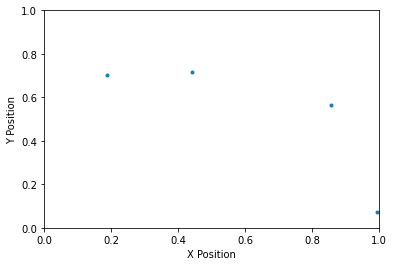

In [15]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl
#set starting conditions
N = 400 
X  = np.random.random((N,2))
L=1
particles=[N]
#define functions
def movement(X):
        dX=np.random.normal(loc=0.0, scale=0.01, size=(len(X),2))
        X=X+dX 
        return X

def boundary(X):
    X[X>L]-=L 
    X[X<0]+=L
    return X

def nearestNeighbour_usingUfuncs(X):
    nParticles = len(X)
    diff = X.reshape(nParticles,1,2)-X
    D = (diff ** 2).sum(2)
    i = np.arange(nParticles)
    D[i,i] = np.inf
    
    nearestNeighbourNumber = np.argmin(D, 1)
    nearestNeighbourDistance = D[ i, nearestNeighbourNumber]
    
    return nearestNeighbourNumber, nearestNeighbourDistance

#intitiate while loop
while len(X) >(N/100):
    #add a small random distance to position
    X=movement(X)
    
    #set boundary conditions
    X=boundary(X)

    #Find nearest neighbour
    index,distance=nearestNeighbour_usingUfuncs(X)
    
    #update array 
    X=X[distance>0.001]
    
    #record number of particles and append to particles list
    particles.append(len(X))
   
    #plot the box where the particles are observed
    pl.clf()
    pl.plot(X[:,0], X[:,1], ".")
    pl.xlim(0,L)
    pl.ylim(0,L)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(0.2) 
    
    #print(particles)

# Analysis 

In the above loop the number of particles after each run is recorded and added to the list particles. The number of particles is plotted against the index for a visual representation of the decay of particles in the atmosphere. 

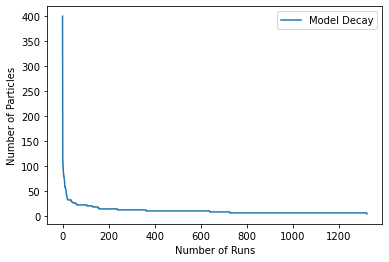

In [16]:
plt.plot(particles,label=("Model Decay")) # plot the array of the number of particles against iteration number
plt.xlabel("Number of Runs")
plt.ylabel("Number of Particles")

plt.legend() #create a legend

# Limitations of the model 

The particles move in incremental steps so there is a possibibility that the particles are passing by each other in between movements. This could be improved by decreasing the scale of the movements but this would require many more loops before 1% of the starting population is reached. 

The value of N chosen must be small enough that the generated particles are not immediately removed, as the value of N tends to infinity the number of loops needed to reach 1% of the initial value becomes zero. 

# Experimentation with looped model

In [17]:
def nearestNeighbour_withLoops(X):
    nParticles = len(X)
    
    nearestNeighbourDistance = np.inf * np.ones(nParticles) #create an array of ones the length of X and convert them to integers
    nearestNeighbourNumber = np.empty(nParticles, dtype=int) # create an empty array the lenth of X
    
    for i in range(nParticles):
        for j in range(i+1,nParticles):
            dist = (X[i,0]-X[j,0])**2+(X[i,1]-X[j,1])**2 #the formula to calculate the distance to another particle for the x and y positions
            if (dist<nearestNeighbourDistance[i]): #boolean mask to filter out small distances and place them in an array in he x value of position
                nearestNeighbourDistance[i] = dist
                nearestNeighbourNumber[i] = j 
            if(dist<nearestNeighbourDistance[j]): #same mask but for y values of position
                nearestNeighbourDistance[j] = dist
                nearestNeighbourNumber[j] = i
                
    return nearestNeighbourNumber, nearestNeighbourDistance
  
def nearestNeighbour_usingUfuncs(X):
    nParticles = len(X)
    diff = X.reshape(nParticles,1,2)-X
    D = (diff ** 2).sum(2)
    j = np.arange(nParticles)
    D[j,j] = np.inf
    
    nearestNeighbourNumber = np.argmin(D, 1)
    nearestNeighbourDistance = D[ j, nearestNeighbourNumber]
    
    return nearestNeighbourNumber, nearestNeighbourDistance

In [18]:
power=np.arange(1,4) #create a list from 1 to 4
n=10**power #multiply 10 to the power of every element of power
print("n = ",n)
n_len=len(n)  
timeMinDiff_loops=np.arange(n_len,dtype="float")#Create an array for storing the results, one for each sample
timeMinDiff_ufunc=np.arange(n_len,dtype="float")

#Loop over each sample size
for i in range(n_len): #create a loop to test multiple different powers
    print("Iteration ",i,"   Sample size, n = ",n[i])
    
    a=np.random.random((n[i],2)) #create an array of random values below the size of the value of n from the current iteration
        
    e=%timeit -o nearestNeighbour_usingUfuncs(a)   
    d=%timeit -o nearestNeighbour_withLoops(a) #Time the performance of both of the functions    
    
    timeMinDiff_loops[i]=d.best #Save the best time for this sample size
    timeMinDiff_ufunc[i]=e.best

n =  [  10  100 1000]
Iteration  0    Sample size, n =  10
15.4 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
66.3 µs ± 996 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Iteration  1    Sample size, n =  100
342 µs ± 6.76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.87 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Iteration  2    Sample size, n =  1000
40.8 ms ± 529 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
586 ms ± 8.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


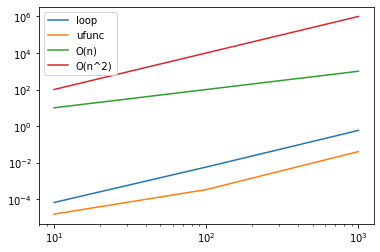

In [19]:
plt.loglog(n,timeMinDiff_loops,label="loop") #plot the two nearest neighbour functions as well as n and n^2 computational efficiency
plt.loglog(n,timeMinDiff_ufunc,label="ufunc")
plt.loglog(n,n,label="O(n)")
plt.loglog(n,n**2,label="O(n^2)")

plt.legend()

The loop method is much slower than the broadcasting and ufuncs. Broadcasting allows an array to interact with a number or array of a different shape. This decreases the amount of time and computational power used on the function as every element does not have to be individually found and applied.

# Model Conclusion

The rate at which sulfates decay in the stratosphere is exponential. Many of them immediately coelless and drop out of the ash cloud but once they are more spread out it becomes rarer that two particles intercept. 